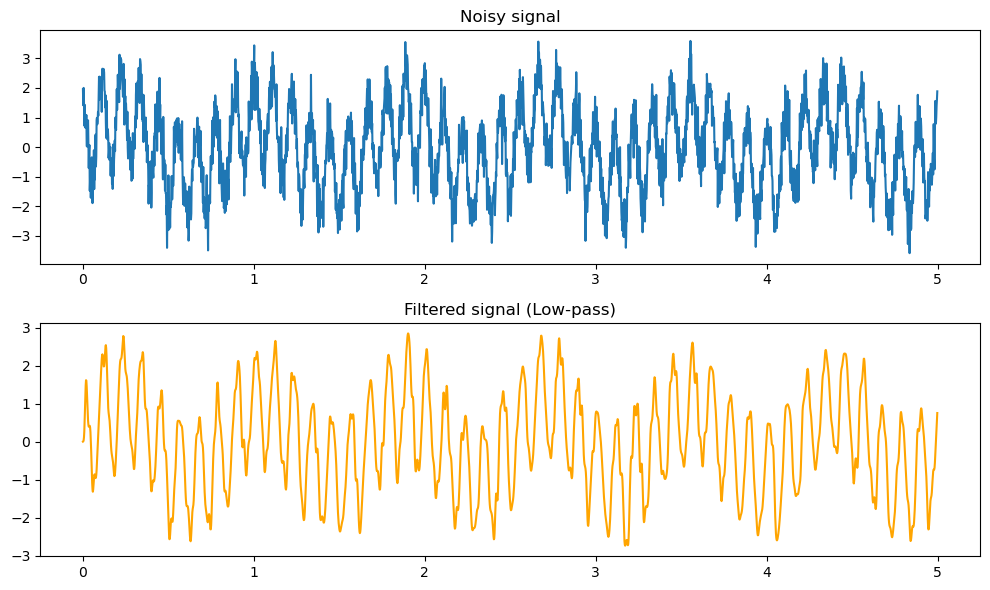

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Low-pass filter design
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalize the frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters
fs = 500.0  # Sample frequency (Hz)
cutoff = 50.0  # Desired cutoff frequency (Hz)
order = 6  # Filter order
T = 5.0  # seconds
n = int(T * fs)  # Total number of samples
t = np.linspace(0, T, n, endpoint=False)

# Create a noisy signal
signal = np.sin(1.2 * 2 * np.pi * t) + 1.5 * np.cos(9 * 2 * np.pi * t) + 0.5 * np.random.randn(n)

# Apply low-pass filter
filtered_signal = butter_lowpass_filter(signal, cutoff, fs, order)

# Plot the signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Noisy signal')
plt.title('Noisy signal')
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered signal', color='orange')
plt.title('Filtered signal (Low-pass)')
plt.tight_layout()
plt.show()
